# Introduction
---
In this notebook, we couple a compartment-based model with Brownian dynamics to simulate the cation diffusion near a PBA particle. In this one-dimensional multi-resolution model, the PBA particle is simplified as a reactive boundary, which intercalates $i-$cation according to a fixed propability, $p_{itc}$. At the end of this notebook, we use the model to show that the intercalated amount of cation is influenced by two factors: the diffusion coeffcient $D$ and $p_{itc}$. To reproduce the experimental data[(K.C.Smith et al,2018)](https://arxiv.org/ftp/arxiv/papers/1612/1612.08293.pdf), we set $p_{itc,Na}=0.001$ and $p_{itc,K}=0.407$. The results also indicate that the intercalation energy difference between Na-ion and K-ion, $E_{Na}-E_{K}=0.155eV$ at room temperature.

# Formulation of Compartment-based Diffusion
---
We consider ion $A$ that diffuse in the domain $[0, L] \times[0, h] \times[0, h],$ A illustrative reaction-diftusion model can be formulated as follows. We first divide the domain into $K$ compartments of length $h$. We denote the number of $A$ ions in the $i$ th compartment $[(i-1) h, i h)$ by $A_{i}, i=1,2, \ldots, K$. **As a result of Brownian motion, ions jump between neighbouring compartments. Thus we model diffusion as the following chain of “chemical reactions":**

$$
\emptyset\substack{\overset{d}{\rightarrow}\\ \underset{d}{\leftarrow}}A_1\substack{\overset{d}{\rightarrow}\\ \underset{d}{\leftarrow}}\cdots\substack{\overset{d}{\rightarrow}\\ \underset{d}{\leftarrow}}A_K\text{--(1)}
$$

The rate constant is
$$
d=D/h^2
$$

where $D$ is the diffusion constant and $h$ is the compartment length.

## Justify $d=D/h^2$
We denote by $p(\mathbf{n}, t)$ the joint probability that $A_{i}(t)=n_{i},i=1,2, \ldots, K,$ where $\mathbf{n}=\left[n_{1}, n_{2}, \ldots, n_{K}\right] .$ Let us define the operators $R_{i}, L_{i}: \mathbb{N}^{K} \rightarrow \mathbb{N}^{K}$ (where $\mathbb{N}$ is the set of non-negative integers) by

$$
R_{i}:\left[n_{1}, \ldots, n_{i}, n_{i+1}, \ldots, n_{K}\right] \rightarrow\left[n_{1}, \ldots, n_{i}+1, n_{i+1}-1, \ldots, n_{K}\right]
$$

for $i=1,2, \ldots, K-1,$ and

$$
L_{i}:\left[n_{1}, \ldots, n_{i-1}, n_{i}, \ldots, n_{K}\right] \rightarrow\left[n_{1}, \ldots, n_{i-1}-1, n_{i}+1, \ldots, n_{K}\right]
$$

for $i=2,3, \ldots, K .$

For a "reaction" $A_{i-1}\overset{d}{\rightarrow}A_{i}$, we have the following probability:

1. $P\{$no reaction happened during $ (t,t+\Delta t)\}=1-dn_{i-1}\Delta t+\mathcal{O}(\Delta^2 t)$

2. $P\{$exactly one reaction happened during $ (t,t+\Delta t)\}=dn_{i-1}\Delta t+\mathcal{O}(\Delta^2 t)$

3. $P\{$two or more reactions happened during $ (t,t+\Delta t)\}=\mathcal{O}(\Delta^2 t)$

Now, if we choose $\Delta t$ such that $O(\Delta^2 t)$ is negligible, we can use the definition of $p(\mathbf{n},t)$, $L_i$ and $R_i$ to write down the **chemical master equation**:

$$
p(\mathbf{n},t+\Delta t)=p(\mathbf{n},t)\left[1-d\Delta t\Sigma_{i=1}^{K-1}n_i-d\Delta t\Sigma_{j=2}^{K}n_j\right]+d\Delta t\left[\Sigma_{i=1}^{K-1}(n_i+1)p(R_i\mathbf{n})+\Sigma_{j=2}^{K}(n_i+1)p(L_i\mathbf{n})\right]
$$

After simple rearrangements, we obtain:
$$
\begin{aligned} \frac{\partial p(\mathbf{n})}{\partial t}=& d \sum_{j=1}^{K-1}\left\{\left(n_{j}+1\right) p\left(R_{j} \mathbf{n}\right)-n_{j} p(\mathbf{n})\right\} \\ &+d \sum_{j=2}^{K}\left\{\left(n_{j}+1\right) p\left(L_{j} \mathbf{n}\right)-n_{j} p(\mathbf{n})\right\} \end{aligned}\text{------(2)}
$$

The mean is defined as the vector $\mathbf{M}(t) \equiv\left[M_{1}, M_{2}, \ldots, M_{K}\right]$ where
$$
M_{i}(t)=\sum_{\mathbf{n}} n_{i} p(\mathbf{n}, t) \equiv \sum_{n_{1}=0}^{\infty} \sum_{n_{2}=0}^{\infty} \cdots \sum_{n_{k}=0}^{\infty} n_{i} p(\mathbf{n}, t)\text{------(3)}
$$

Multiplying (2) by $n_{i}$ and summing over $\mathrm{n}$, we obtain:

$$
\begin{aligned} \frac{1}{d}\frac{\partial M_i}{\partial t}=& \sum_{j=1}^{K-1}\left\{\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(R_{j} \mathbf{n}\right)-\sum_{\mathbf{n}}n_i n_{j} p(\mathbf{n})\right\} \\ &+ \sum_{j=2}^{K}\left\{\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(L_{j} \mathbf{n}\right)-\sum_{\mathbf{n}}n_i n_{j} p(\mathbf{n})\right\} \end{aligned}
$$

Using the definition of $M_i$, we have:
$$
\begin{aligned} \frac{1}{d}\frac{\partial M_i}{\partial t}=& \sum_{j=1}^{K-1}\left\{\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(R_{j} \mathbf{n}\right)\right\} \\ &+ \sum_{j=2}^{K}\left\{\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(L_{j} \mathbf{n}\right)\right\}\\ &- \sum_{j=2}^{K}M_iM_j-\sum_{j=1}^{K-1}M_iM_j \end{aligned}\text{------(4)}
$$

If $i\neq j+1,j,j-1$, then 

$$
\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(R_{j} \mathbf{n}\right)=M_iM_j\text{------(5)}\\
\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(L_{j} \mathbf{n}\right)=M_iM_j\text{------(6)}
$$

If $i=j+1$(i.e., $j=i-1$), then

$$
\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(R_{j} \mathbf{n}\right)=\sum_{\mathbf{n}}(n_i-1+1)(n_{i-1}+1) p\left(R_{j} \mathbf{n}\right)\\=\sum_{\mathbf{n}}(n_i-1)(n_{i-1}+1) p\left(R_{j} \mathbf{n}\right)+\sum_{\mathbf{n}}(n_{i-1}+1) p\left(R_{j} \mathbf{n}\right)\\=M_iM_{i-1}+M_{i-1}\text{------(7)}
$$

Similarly, if $i=j-1$, we have

$$
\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(L_{j} \mathbf{n}\right)=M_iM_{i+1}+M_{i+1}\text{------(8)}
$$

Finally, if $i=j$, we have:

$$
\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(L_{j} \mathbf{n}\right)=\sum_{\mathbf{n}}n_i\left(n_{j}+1\right) p\left(L_{j} \mathbf{n}\right)=M_iM_{i}-M_{i}\text{------(9)}
$$

Combining (4)-(9), we obtain a system of PDEs:

$$
\begin{aligned} \frac{\partial M_{i}}{\partial t}=d\left(M_{i+1}+M_{i-1}-2 M_{i}\right), & i=2,3, \ldots, K-1 \\ \frac{\partial M_{1}}{\partial t}=d\left(M_{2}-M_{1}\right), & \frac{\partial M_{K}}{\partial t}=d\left(M_{K-1}-M_{K}\right) \end{aligned}\text{------(10)}
$$

Next we rewrite these PDEs in terms of concentration $c(x, t),$ which can be approximated as $c\left(x_{i}, t\right) \approx M_{i}(t) / h,$ where $x_{i}$ is the center of the $i$ th compartment, $i=1,2, \ldots, K .$ Dividing (10) by $h,$ we obtain

$$
\frac{\partial c}{\partial t}\left(x_{i}, t\right) \approx d\left(c\left(x_{i}+h, t\right)+c\left(x_{i}-h, t\right)-2 c\left(x_{i}, t\right)\right)
$$

By Taylor expansion for RHS, we have

$$
\frac{\partial c}{\partial t}\left(x_{i}, t\right) \approx d h^{2} \frac{\partial^{2} c}{\partial x^{2}}\left(x_{i}, t\right)
$$

**Comparing to the diffusion equation, we now confirm that** $d=D/h^2$

## Time Interval to Next "Reaction"
---
**The time interval to the next reaction, $\tau$, is distributed according to the exponential distribution.** Now, let's introduce a theorem to help us calculating $\tau$:

>**Theorem 1**:
If $\tau$ is a random number in the interval $(0, \infty),$ then $exp(-\alpha(t)\tau)$ is a random number uniformly distributed in the interval $(0,1)$.

where $\alpha(t)$ is the **propensity function of a reaction**, and $a(t)\Delta t=P\{$exactly one reaction happens during  $(t,t+\Delta t)\}$. In our case, the propensity function for a "reaction" happening at $i$th compartment is:

$$
\alpha_i(t)=n_i(t)d\text{------(11)}
$$

Based on **Theorem 1**, we can calculate the $\tau$ by following the stochastic simulation method (SSA) as:

1. Generate a random number, $r$, in the range of $(0,1)$;

2. Calculate $\tau$ according to
$$\tau=\frac{1}{\alpha(t)}ln\left(r\right)\text{------(12)}$$

where 

$$\alpha(t)=\sum_{1}^{K-1}\alpha_i(t)+\sum_{2}^{K}\alpha_j(t)\text{------(13)}$$


## Stochastic Simulation Algorithm (SSA) for Diffusion
---
>1. Generate two random numbers $r_{1}, r_{2}$ uniformly distributed in $(0,1)$

>2. Compute propensity functions of reactions $\alpha_{i}(t)$ by $(11).$ Compute
$\alpha$ by $(13).$

>3. Computer $\tau$ using (12)

>4. If $r_{2}<\sum_{i=1}^{K-1} \alpha_{i} / \alpha_{0},$ then find $j \in\{1,2, \ldots, K-1\}$ such that
$$
r_{2} \geq \frac{1}{\alpha_{0}} \sum_{i=1}^{j-1} \alpha_{i} \quad \text { and } \quad r_{2}<\frac{1}{\alpha_{0}} \sum_{i=1}^{j} \alpha_{i}
$$
we update system at time $t+\tau$ as:
$$
\begin{aligned} A_{j}(t+\tau) &=A_{j}(t)-1 \\ A_{j+1}(t+\tau) &=A_{j+1}(t)+1 \\ A_{i}(t+\tau) &=A_{i}(t), \quad \text { for } i \neq j, \quad i \neq j+1 \end{aligned}
$$

>5. If $r_{2} \geq \sum_{i=1}^{K-1} \alpha_{i} / \alpha_{0},$ then find $j \in\{2,3, \ldots, K\}$ such that
$$
r_{2} \geq \frac{1}{\alpha_{0}}\left(\sum_{i=1}^{K-1} \alpha_{i}+\sum_{i=2}^{j-1} \alpha_{i}\right) \quad \text { and } \quad r_{2}<\frac{1}{\alpha_{0}}\left(\sum_{i=1}^{K-1} \alpha_{i}+\sum_{i=2}^{j} \alpha_{i}\right)
$$
Then compute the number of molecules at time $t+\tau$ by:
$$
\begin{aligned} A_{j}(t+\tau) &=A_{j}(t)-1 \\ A_{j-1}(t+\tau) &=A_{j-1}(t)+1 \\ A_{i}(t+\tau) &=A_{i}(t), \quad \text { for } i \neq j, i \neq j-1 \end{aligned}
$$

>6 Go back to 1

## Implement SSA
---
The following code implements the SSA described above in a 1D space with length $L=1$. To check if the implementation is correct, we also solve the diffusion equation using the Euler forward method. The initial and boundary conditions are:
$$
c(0,0)=N
$$
$$
\frac{\partial c}{\partial x}(0,t)=0,\frac{\partial c}{\partial x}(L,t)=0
$$

In [10]:
import numpy as np
from numpy.random import uniform

def compartment(nc,x0,ntot,d,ttot):
    """
    nc: number of compartments
    x0: initial compartment that contains molecules
    ntot: total number of molecules
    d: D/h^2
    ttot: total simulation time
    """
    t = 0
    alst = np.zeros(nc,dtype=int)
    alst[x0]=ntot
    fw = d*alst[:-1]
    bk = d*alst[1:]
    
    while t<ttot:
        
        a0 = np.sum(fw)+np.sum(bk)
        r1,r2 = uniform(size=2)
        t += 1/a0*np.log(1/r1)
        plst = np.cumsum(fw.tolist()+bk.tolist())/a0
        i = int(np.sum(plst<r2))
  
        if i<nc-1 and alst[i]>0:
            alst[i]-=1
            alst[i+1]+=1
        elif alst[i-nc+2]>0:
            alst[i-nc+2]-=1
            alst[i-nc+1]+=1
                
        fw = d*alst[:-1]
        bk = d*alst[1:]
        
    return alst

# Euler Forward Method to solve diffusion equation
def efm(x0,D,l,n,dt,ttot):
    xs = np.linspace(0,l,n,endpoint=True)
    dx = xs[1]-xs[0]
    ps = np.zeros(n)
    ps[x0]=1
    # prep RHS at t
    rhs = np.zeros(n)
    curt = 0
    while curt<ttot:
        for i in range(1,n-1):
            rhs[i] = (D/dx**2)*(ps[i+1] - 2*ps[i] + ps[i-1])
        rhs[n-1] = (2*D/dx**2)*(ps[n-2]-ps[n-1]) # B.C.
        rhs[0] = (2*D/dx**2)*(ps[1]-ps[0]) # B.C.
        rhs = rhs*dt
        ps += rhs
        curt+=dt
    return xs, ps

In [19]:
Dcoeff = 0.0001
T = 600
Dt = 0.01
L = 1
Ntot = 100
Nc=40
X0=0
nlst = compartment(Nc,X0,Ntot,Dcoeff/(L/Nc)**2,T)
xloc,cs = efm(X0,Dcoeff,L,Nc,Dt,T)

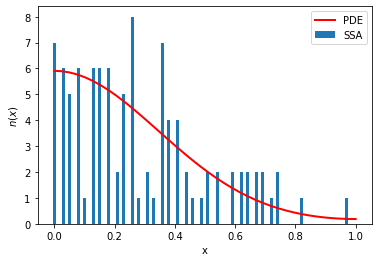

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xloc,2*cs*Ntot,'r-',linewidth=2,label='PDE')
xs = np.round(np.linspace(0,1,Nc),2)
plt.bar(xs,nlst,width=0.01,label='SSA')
plt.xlabel('x')
plt.ylabel('$n(x)$')
plt.legend()

# Formulation of Molecule-based Diffusion
---
## Stochastic Differential Equation for Diffusion
If the molecule diffuse in a 3D space with diffusion coefficient $D$, the following stochastic differential equation can be used to described the diffusive behavior:
$$
\begin{array}{l}{X(t+\mathrm{d} t)=X(t)+\sqrt{2 D} \mathrm{d} W_{x}} \\ {Y(t+\mathrm{d} t)=Y(t)+\sqrt{2 D} \mathrm{d} W_{y}} \\ {Z(t+\mathrm{d} t)=Z(t)+\sqrt{2 D} \mathrm{d} W_{z}}\end{array}
$$
where $dW_i$ is a Wiener process and is simulated as $dW_i=\sqrt{\Delta t}\xi_i$. Note that $\xi_i$ is a random number sampled from a normal distribution.

## Implementation of Molecule-based Diffusion
---
The following code implements a 1D molecule-based diffusion with reflecting boundary condition. The initial condition remains the same as the previous SSA.

In [6]:
from scipy.stats import norm
import numpy as np
from numpy.random import uniform

def molecule(L,D,xa,xb,n0,ttot,dt):
    mlst = uniform(size=n0)*(xb-xa)+xa
    rv = norm()
    t = 0
    sqdt = np.sqrt(dt)
    sqd = np.sqrt(2*D)*sqdt
    while t<ttot:
        t+=dt
        rvs = rv.rvs(size=n0)
        mlst+=sqd*rvs
        mlst[mlst<0]=-mlst[mlst<0]
        mlst[mlst>L]=2*L-mlst[mlst>L]
    return mlst

In [7]:
Dcoeff = 0.0001
T = 600
Dt = 0.01
L = 1
Ntot = 100
Nc=40
Xa,Xb=0,L/Nc
Mlst = molecule(L,Dcoeff,Xa,Xb,Ntot,T,Dt)

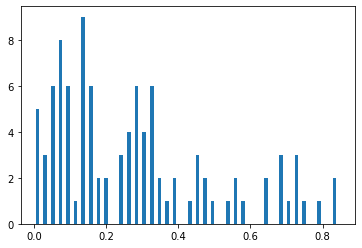

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
_=plt.hist(Mlst,bins=40,width=0.01)

# Coupling Compartment-based Model with Molecule-based Model

We now couple the compartment-based (CB) model with the molecule-based (MB) model, so that we can use molecule-based model at the subdomain we are interested while use compartment-based model in the subdomain that are not so interesting. The 1D domain described above is now composed of two subdomains: the left domain $\Omega_c$ and the right domain $\Omega_m$. We will use CB model at the left, and MB at the right. A schematic of this 1D domain is shown below:
![domain schematic](01.PNG)

Let's forget about the reactive boundary for a moment. The key to make this coupling happen is adding the follwoing "reaction" from the compartment $A_1$ to $\Omega_m$:
$$
A_1\overset{r}{\rightarrow}\Omega_m
$$
Next, we formulate the transition of molecules between $\Omega_{c}$ and $\Omega_{m}$ with the help of two parameters: a positive constant $\phi,$ and a probability distribution function $f:[0, L] \rightarrow[0, \infty),$ where $\int_{0}^{L} f(x) \mathrm{d} x=1 .$

We postulate that **the transition rate for moving across the interface $I$ from $\Omega_{\mathrm{c}}$ to $\Omega_{\mathrm{m}}$ is $\Phi d,$ i.e. it is equal to the internal transition rate $d=D / h^{2}$ multiplied by the constant $\phi .$(i.e. $r=d\phi$)** 

## Find accurate $\phi$ and $f(x)$
---
**Let's first consider the SSA for $N=1$ molecule**. We can equivalently describe this problem using mathematical equations, which can be analysed to get the correct values of  $\phi$ and $f(x)$. To simplify the resulting equations, we replace the finite domain $[-L, L],$ by the infinite domain, $(-\infty, \infty)$. Then we do not need to worry about boundary conditions.

Using $N=1,$ we denote by $p_{i}(t)$ the probability that the considered molecule is in the ith compartment, $i$, 2, $3, \ldots .$ Let $p(x, t)$ be its probability density in $\Omega_{m}=(0, \infty) .$ Using similar arguments as we used to derive the chemical master equation, the random walk in the $i$ th compartment can be described by

$$
p_{i}(t+\Delta t)=\left(1-2 \frac{D \Delta t}{h^{2}}\right) p_{i}(t)+\frac{D \Delta t}{h^{2}}\left(p_{i-1}(t)+p_{i+1}(t)\right), \quad \text { for } i \geq 2
$$

For $p_1$ and $p(x,t)$, we can describe them using evolution equations:

$$
\begin{aligned} p_{1}(t+\Delta t)=&\left(1-\frac{(1+\phi) D \Delta t}{h^{2}}\right) p_{1}(t)+\frac{D \Delta t}{h^{2}} p_{2}(t) \\ &+\frac{1}{h \sqrt{4 \pi D \Delta t}} \int_{0}^{\infty} \int_{0}^{\infty} p(y, t) \exp \left(-\frac{(x+y)^{2}}{4 D \Delta t}\right) \mathrm{d} x \mathrm{d} y \\ &+\frac{1}{h \sqrt{4 \pi D \Delta t}} \int_{0}^{\infty} \int_{0}^{\infty} p(y, t) \exp \left(-\frac{x y}{D \Delta t}\right) \exp \left(-\frac{(x-y)^{2}}{4 D \Delta t}\right) \mathrm{d} x \mathrm{d} y \end{aligned}\text{---(14)}
$$

The third term at RHS represents the possibility that none of the particles in $\Omega_m$ passed the interface $I$ during $\Delta t$. The fourth term represents the possibility of particles in $\Omega_m$ passing $I$ and then back to $\Omega_m$ during $\Delta t$. Please refer to the notebook (4.4) for the details of proof. Similarly, $p(x,t+\Delta t)$ can be derived as:

$$
\begin{aligned} p(x, t+\Delta t)=& \frac{1}{\sqrt{4 \pi D \Delta t}} \int_{0}^{\infty} p(y, t)\left[\exp \left(-\frac{(x-y)^{2}}{4 D \Delta t}\right)-\exp \left(-\frac{(x+y)^{2}}{4 D \Delta t}\right)\right] \mathrm{d} y \\ &+\frac{D \Delta t \phi}{h} f(x) p_{1}(t) \end{aligned}\text{---(15)}
$$

[Flegg et al. ( 2012)](https://royalsocietypublishing.org/doi/full/10.1098/rsif.2011.0574) analysed equations $(14)-(15)$ using the method of matched asymptotic expansions with the aim of finding the values of $\Phi$ and $f(x)$ that minimize the error at interface $I=\{0\} .$ Such an analysis leads to the following formulae for $\Phi$ and $f(x):$

$$
\phi=\frac{2 h}{\sqrt{\pi D \Delta t}}, \quad f(x)=\frac{\pi}{4 D \Delta t} \operatorname{erfc}\left(\frac{x}{\sqrt{4 D \Delta t}}\right), \quad x \in \Omega_{\mathrm{m}}\text{--(16)}
$$

where

$$
\operatorname{erfc}(z)=\frac{2}{\sqrt{\pi}} \int_{z}^{\infty} \exp \left(-y^{2}\right) \mathrm{d} y
$$

One advantage of formula ($16$) is that **it can be applied in simulations even by modellers who might not be interested in its mathematical derivation. All they need is a method to sample random numbers from probability distribution $f(x)$**.

# Reactive PBA Boundary
---
If the intercalation on the PBA particle surface follows the **transition state theory**, then **the propability that the PBA boundary intercalates an ion, $p_{itc}$ is simply:**
$$
p_{itc}=exp(-\Delta E/kT)
$$
where $\Delta E$ is the energy barrier that an ion needs to overcome in order to be intercalated. Such parameter can be obtained by performing NEB calculations on different kinds of ions. How to find $\Delta E$ is also a very interesting research topic for PBA material modeling.

Now, we can focus on the evolution of ions in $\Omega_m$ only. As before, we choose a small time step $\Delta t$ and we compute $X(t)$ iteratively by:

$$
X(t+\Delta t)=X(t)+\sqrt{2 D \Delta t} \xi\text{---(17)}
$$

However, there is still a **non-zero probability that the particle has hit the reactive boundary $\{x=L\}$ sometimes during the time interval $(t, t+\Delta t) .$** It can be shown that the possibility $p_{hit}$ is:

$$
p_{hit}=\exp \left[\frac{-(L-X(t)) (L-X(t+\Delta t))}{D \Delta t}\right]\text{---(18)}
$$

Thus, we can implement the reactive boundary condition at $x=L$ as follows:

1. compute the position $X(t+\Delta t)$

2. If $X(t+\Delta t)$ is larger than $L$, then we generate an random number $r$ uniformly in $(0,1)$. If $r<p_{itc}$, we remove the ion. 

3. If $X(t+\Delta t)$ is less than $L$, then we generate a random number $r$ uniformly in $(0,1)$ and we remove the molecule from the solution if $r<p_{hit}p_{itc}$

## Proof of equation (18)
---
Transform $x$ as $y=L-x$, and let $p(y,t)dt$ be the possibility of finding the particle within $[y,y+dy)$ at time t. From the SDE (17) we have the Fokker-Planck equation:

$$
\frac{\partial p}{\partial t}(y, t)=D \frac{\partial^{2} p}{\partial x^{2}}(y, t)
$$

If we use the initial condition of $p(y,0)=\delta(y_1)$, we have the following solution:

$$
p(y, t)=\frac{1}{(4 D \pi t)^{1 / 2}} \exp \left[-\frac{(y-y_1)^{2}}{4 D t}\right]
$$

Therefore, 
$$
P\{Y(\Delta t)=y_2>0\}=\frac{1}{(4 D \pi \Delta t)^{1 / 2}} \exp \left[-\frac{(y_2-y_1)^{2}}{4 D \Delta t}\right]\Delta t
$$

The probability that the particle crossed the boundary and arrived at the point $x=x_{2}$ is equal to the probability the particle arrived at the point $x=-x_{2}$ (to justify this statement, note that every trajectory which has reached the boundary $x=0$ can be, after the hitting point, reflected around $x=0$ to get the trajectory which ends up at $y=-y_{2}$ ). Thus:

$$
P\{crossed, Y(\Delta t)=y_2>0\}=\frac{1}{(4 D \pi \Delta t)^{1 / 2}} \exp \left[-\frac{(-y_2-y_1)^{2}}{4 D \Delta t}\right]\\=\frac{1}{(4 D \pi \Delta t)^{1 / 2}} \exp \left[-\frac{(y_2+y_1)^{2}}{4 D \Delta t}\right]\Delta t
$$

Therefore,

$$
P\{crossed| Y(\Delta t)=y_2>0\}\\=P\{crossed, Y(\Delta t)=y_2>0\}/P\{Y(\Delta t)=y_2>0\}\\=\exp \left[\frac{-Y(t) Y(t+\Delta t)}{D \Delta t}\right]
$$

Since $Y = L-X$, we now have
$$
p_{hit}=\exp \left[\frac{-(L-X(t)) (L-X(t+\Delta t))}{D \Delta t}\right]
$$

# Multi-resolution SSA
---
Combining the results from previus sections, we now propose a SSA to simulate this multi-resolution domain as follow:


1. Set $\delta A_{i}=0$ for $i=1,2, \ldots, K$

2. Generate $K-1$ random numbers $r_{i}^{L}, i=1,2, \ldots, K-1,$ uniformly distributed in $(0,1) .$ **If $r_{i}^{L}<d A_{i}(t) \Delta t,$ then $\delta A_{i}=\delta A_{i}-1$ and $\delta A_{i+1}=\delta A_{i+1}+1$**

3. Generate $K-1$ random numbers $r_{i}^{R}, i=2,3, \ldots, K,$ uniformly distributed in $(0,1) .$ **If $r_{i}^{R}<d A_{i}(t) \Delta t,$ then $\delta A_{i}=\delta A_{i}-1$ and $\delta A_{i-1}=\delta A_{i-1}+1$**

4. Compute the position of each molecule (which is in
molecular-based subdomain $\Omega_{m}$ ) at time $t+\Delta t,$ i.e. compute $X_{i}(t+\Delta t)$ using (17) for $i=1,2, \ldots, N_{\mathrm{m}}(t) .$

5. If $X_{i}(t+\Delta t), i=1,2, \ldots, N_{\mathrm{m}}(t),$ computed by (17) is greater than $L,$ then generate a random number $r_b$ uniformly distributed in $(0,1)$. If $r_b<p_{itc}$ then we remove $X_i$, otherwise,
$$
X_{i}(t+\Delta t)=2 L-X_{i}(t)-\sqrt{2 D \Delta t} \xi_{i}
$$

6. If $X_{i}(t+\Delta t), i=1,2, \ldots, N_{\mathrm{m}}(t),$ computed by (17) is less than $L,$ then generate a random number $r_b$ uniformly distributed in $(0,1)$. If $r_b<p_{itc}p_{hit}$ then we remove $X_i$.

7. If $X_{i}(t+\Delta t), i=1,2, \ldots, N_{\mathrm{m}}(t),$ computed by (17) is less than $0,$ then $\delta A_{1}=\delta A_{1}+1$ and the trajectory of the $i$ th molecule is terminated.

8. If $X_{i}(t+\Delta t), i=1,2, \ldots, N_{\mathrm{m}}(t),$ computed by (17) is greater than $0,$ then generate a random number $r_{b}$ uniformly distributed in $(0,1) .$ If $r_{b}<\exp \left[\frac{-X(t)X(t+\Delta t)}{D \Delta t}\right],$ then $\delta A_{1}=\delta A_{1}+1$ and the trajectory of the $i$ th molecule is terminated.

9. Generate a random number $r_{2}$ uniformly distributed in $(0,1) .$ If $r_{2}<\phi d A_{1}(t) \Delta t,$ then $\delta A_{1}=\delta A_{1}-1$ and a new molecule is introduced at position $x \in \Omega_{\mathrm{m}}$ sampled according to distribution $f(x)$

10. Update numbers of molecules in all compartments using $A_{i}(t+\Delta t)=A_{i}(t)+\delta A_{i}, \quad$ for $i=1,2, \ldots, K$

## Implementation
---
In the following implementation, the CB simulation is performed within the left dormain $[-1,0]$ and the MB simulation is performed within right domain $[0,0.2]$. The probability of intercalation is set to be $0.5$ (i.e. fast reaction). The diffusion coefficient of the ion is set to be $10^{-4}mm^2/sec$. The left domain is divided into 30 compartments. At the $t=0$, the ions are uniformly distributed in the whole dormain. Each compartment in the left subdomain contains 5 ions, and 30 ions are uniformly distributed within the right domain.

$\Delta t$ is set to be $0.001 sec$ to make sure that $d\times A_i \times \Delta t<0.01\ll 1$. We first examin the distribution of ions after 100 sec and after 10 minutes.

In [5]:
import numpy as np
from numpy.random import uniform
import scipy.stats as st
from scipy.stats import rv_continuous
from scipy.stats import norm
from scipy import special
%matplotlib inline
import matplotlib.pyplot as plt

Lr = 0.2
Ll = 1
K = 30
D = 0.0001
Dt = 0.001
T = 100
Phi = 2*Ll/K/np.sqrt(np.pi*D*Dt)
Pitc = 0.5 # Possibility for intercalation to happen


# define PDF from equation (16), Using Hasting algorithm
def phiDistri():
    global D, Dt
    while True:
        xi1,xi3 = uniform(size=2)
        xi2 = -0.532*np.log(xi1)
        if xi1*xi3<0.814*special.erfc(xi2):
            return np.sqrt(4*D*Dt)*xi2
        
# define PDF from equation (16), Using custom PDF function (slow method)
class cm_rv(rv_continuous):
    def _pdf(self, x):
        return special.erfc(x)*np.sqrt(np.pi)

def multiResoSSA(xc0,xm0):
    global Lr,Ll,K,D,Dt,T,Pitc,Phi
    t = 0
    d = D/(Ll/K)**2
    dm = np.sqrt(2*D*Dt)
    clst = np.copy(xc0)
    mlst = np.copy(xm0)
    rv = norm()
    cmrv = cm_rv(a=0,b=Lr/np.sqrt(4*D*Dt),name='cm_pdf')
    while t<T:
        t+=Dt
        dA = np.zeros(K,dtype=int)
        rR = uniform(size=K-1)<d*clst[:-1]*Dt
        rL = uniform(size=K-1)<d*clst[1:]*Dt
        for i,v in enumerate(rR):
            if v:
                dA[i]-=1
                dA[i+1]+=1
        for i,v in enumerate(rL):
            if v:
                dA[i]+=1
                dA[i+1]-=1
        dmlst = dm*rv.rvs(size=len(mlst))
        mdel = []
        for i, m in enumerate(mlst):
            if m+dmlst[i]>Lr:
                if uniform()>Pitc: # if an ion is not intercalated, then reflect it
                    mlst[i]=2*Lr-(m+dmlst[i])
                else:
                    mdel.append(i)
            elif m+dmlst[i]<0:
                mdel.append(i)
                dA[-1]+=1
            else:
                phit_left = np.exp(-m*(m+dmlst[i])/(D*Dt))
                phit_right = np.exp(-(Lr-m)*(Lr-m-dmlst[i])/(D*Dt))*Pitc
                rmid = uniform()
                if rmid<phit_left:
                    mdel.append(i)
                    dA[-1]+=1
                elif phit_left<rmid<phit_left+phit_right:
                    mdel.append(i)
                else:
                    mlst[i]+=dmlst[i]
        mlst = np.delete(mlst,mdel)
        r2 = uniform()
        if r2<Phi*d*clst[-1]*Dt:
            dA[-1]-=1
            mlst=np.append(mlst,phiDistri())
        clst+=dA
        if max(d*clst*Dt)>0.01:
            print('Large Prob for diffusion !')
            print('max d*A*dt:{}'.format(max(d*clst*Dt)))
    return clst, mlst

The following figure shows the implemented distribution of (16)

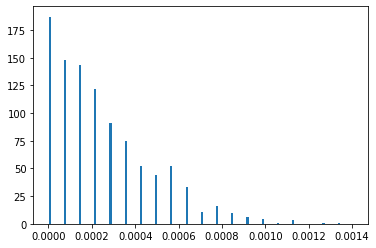

In [10]:
t=cm_rv(a=0,b=Lr/np.sqrt(4*D*Dt),name='cm_pdf')
tl = [phiDistri() for i in range(1000)]
_=plt.hist(tl,bins=20,width=0.00001)

In [6]:
n0=5
Xc0=np.ones(K)*n0
Xm0 = uniform(size=int(n0*K*Lr/Ll))*Lr

Text(0.5, 1.0, 'Ion Distribution after 100 Seconds')

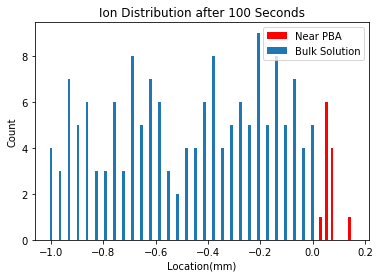

In [14]:
Clst,Mlst=multiResoSSA(Xc0,Xm0)
plt.bar(np.linspace(-Ll,0,K),Clst,width=0.01,label='Bulk Solution')
_=plt.hist(Mlst,bins=6,color='r',width=0.01,label='Near PBA')
plt.legend()
plt.xlabel('Location(mm)')
plt.ylabel('Count')
plt.title('Ion Distribution after 100 Seconds')

Text(0.5, 1.0, 'Ion Distribution after 10 Minutes')

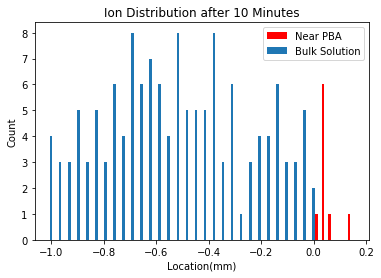

In [15]:
T=500
Clst,Mlst=multiResoSSA(Clst,Mlst)
plt.bar(np.linspace(-Ll,0,K),Clst,width=0.01,label='Bulk Solution')
_=plt.hist(Mlst,bins=6,color='r',width=0.01,label='Near PBA')
plt.legend()
plt.xlabel('Location(mm)')
plt.ylabel('Count')
plt.title('Ion Distribution after 10 Minutes')

**Total number of ions drops from 180 to 136, and the number of ions drops from 150 to 127 in bulk solution, the number of ions drops from 30 to 9 near the PBA particle surface.**

# Compare Different kinds of Ion
---
In the following, we do two simulations in parallel with two kinds of ions. The settings for these two simulations are the same except for the diffusion coefficient. At the end of the simulation, we compare how many ions are intercalated in both cases.

Text(0.5, 1.0, 'Ion Distribution after 10 min ($D=1e-4$)')

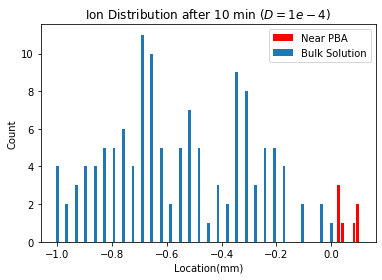

In [18]:
D=0.0001
T = 600
Clst,Mlst=multiResoSSA(Xc0,Xm0)
plt.bar(np.linspace(-Ll,0,K),Clst,width=0.01,label='Bulk Solution')
_=plt.hist(Mlst,bins=6,color='r',width=0.01,label='Near PBA')
plt.legend()
plt.xlabel('Location(mm)')
plt.ylabel('Count')
plt.title('Ion Distribution after 10 min ($D=1e-4$)')

In [22]:
print('{} ions are intercalated'.format(180-sum(Clst)-len(Mlst)))

46.0 ions are intercalated


Text(0.5, 1.0, 'Ion Distribution after 10 min ($D=5e-5$)')

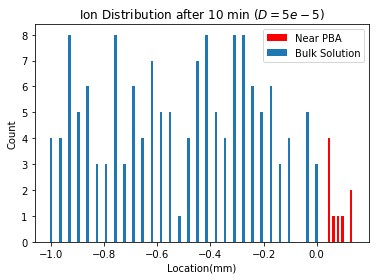

In [23]:
D=0.00005
Clst,Mlst=multiResoSSA(Xc0,Xm0)
plt.bar(np.linspace(-Ll,0,K),Clst,width=0.01,label='Bulk Solution')
_=plt.hist(Mlst,bins=6,color='r',width=0.01,label='Near PBA')
plt.legend()
plt.xlabel('Location(mm)')
plt.ylabel('Count')
plt.title('Ion Distribution after 10 min ($D=5e-5$)')

In [24]:
print('{} ions are intercalated'.format(180-sum(Clst)-len(Mlst)))

23.0 ions are intercalated


**By halving the diffusion coefficient, the number of intercalated ions is also halved.**

## Reproduce experimental results
---
In the following, we will run the simulations for Na-ion and K-ion by using more realistic diffusion coefficient. From the experiment we know that the intercalated amount ratio of K-ion over Na-ion is about 3. Such result indicates the following relationship:
$$
\frac{n_{K}}{n_{Na}}\approx\frac{f(D_{K},p_{itc,K})}{f(D_{Na},p_{itc,Na})}=3\text{---(19)}
$$
where $D_i$ is the diffusion coefficient for $i-$ion, and $p_{itc,i}$ is the possibility of $i-$ion is intercalated if it hits the PBA surface. Again, $p_{itc,i}=exp(-\Delta E_i/kT)$ according to the transition state theory.

Here we choose $D_K=0.00196 mm^2/s$ and $D_{Na}=0.00133 mm^2/s$. For cation $i$, we repeat the simulation for 100 times to calculate the average number of intercalated cation after 60 seconds, $\bar{n}_{i,60}$.

Text(0.5, 1.0, 'Ion Distribution after 60 sec (K-ion)')

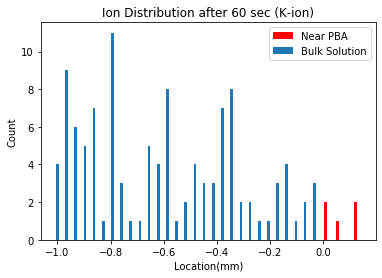

In [8]:
Dt = 0.0001
D=0.00196
Pitc = 0.407
T = 60
Clst,Mlst=multiResoSSA(Xc0,Xm0)
plt.bar(np.linspace(-Ll,0,K),Clst,width=0.01,label='Bulk Solution')
_=plt.hist(Mlst,bins=6,color='r',width=0.01,label='Near PBA')
plt.legend()
plt.xlabel('Location(mm)')
plt.ylabel('Count')
plt.title('Ion Distribution after 60 sec (K-ion)')

In [9]:
print('{} ions are intercalated'.format(180-sum(Clst)-len(Mlst)))

63.0 ions are intercalated


Text(0.5, 1.0, 'Ion Distribution after 60 sec (Na-ion)')

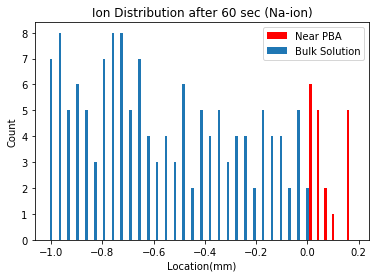

In [22]:
D=0.00133
Pitc = 0.001
Clst,Mlst=multiResoSSA(Xc0,Xm0)
plt.bar(np.linspace(-Ll,0,K),Clst,width=0.01,label='Bulk Solution')
_=plt.hist(Mlst,bins=6,color='r',width=0.01,label='Near PBA')
plt.legend()
plt.xlabel('Location(mm)')
plt.ylabel('Count')
plt.title('Ion Distribution after 60 sec (Na-ion)')

In [23]:
print('{} ions are intercalated'.format(180-sum(Clst)-len(Mlst)))

21.0 ions are intercalated


# Conclusion
---
By setting $p_{itc,i}$ to different values, we are trying to reproduce  $\frac{\bar{n}_{K,60}}{\bar{n}_{Na,60}}\approx 3$. When $p_{itc,K}=0.407$ and $p_{itc,Na}=0.001$, we have $\bar{n}_{K,60}=63$ and $\bar{n}_{Na,60}=21$. According to the transition state theory, we have $\Delta E_{Na}-\Delta E_{K}\approx 0.155eV$ at $T=300K$, where $\Delta E_i$ is the intercalation energy.

Let's finally summarize the assumption this multi-resolution SSA is based upon.

- We assume a dilute solution near the PBA particle surface

- We assume that the influence of other charged species on the interested cation is negligible

- We assume no "diffusion reaction" could happen during $\Delta t = 0.1 ms$ as $dA_i(t)\Delta t\ll 1$[(Erban and Chapman,2019)](https://books.google.com/books?hl=en&lr=&id=YG_CDwAAQBAJ&oi=fnd&pg=PR9&dq=Stochastic+Modelling+of+Reaction%E2%80%93Diffusion+Processes&ots=lSpzt1E18d&sig=zaVmDQM7vorK6jjHDjgzTNwL_B0#v=onepage&q=Stochastic%20Modelling%20of%20Reaction%E2%80%93Diffusion%20Processes&f=false)